In [1]:
from interface import SpectralPipeline, build_model
from plotting import ROC_plot
from scipy.stats import gamma, beta
import spectral_clusterings
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# set up model
pi, N, rho = 0.1, 1000, 0.25

model = build_model(beta, [0.45,1], pi, False, "Beta(9/20,1)")
samples, gts = model.sample_permute(rho = rho, N = N, n = 3)

# thhis is quite an easy regime with truncated mean far smaller than 0.5
anom_block = samples[0][np.array(gts[0], dtype="bool")][:,np.array(gts[0], dtype="bool")]
print (np.mean(anom_block[anom_block != 0.999]))

0.3056048558366869


In [3]:
# set up predictor
predictor = SpectralPipeline({
    "init": "stouffer",
    "cluster": "gmm",
    "refine": "bp"
}, model)

In [4]:
# do prediction
predictions = predictor.predict(samples, max_iter = 100, verbose = True)

Converged after 40 iterations...
Converged after 40 iterations...
Converged after 40 iterations...


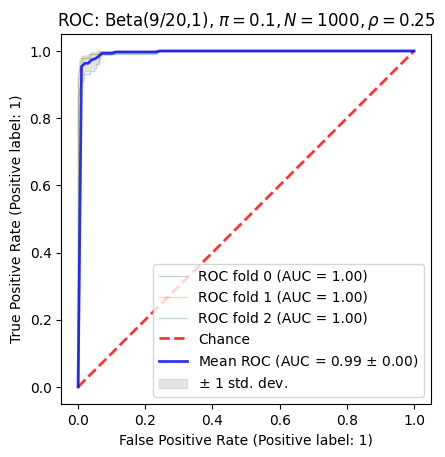

In [5]:
ROC_plot(gts, predictions, f"{model.dist_label}, $\\pi = {pi}, N = {N}, \\rho = {rho}$")

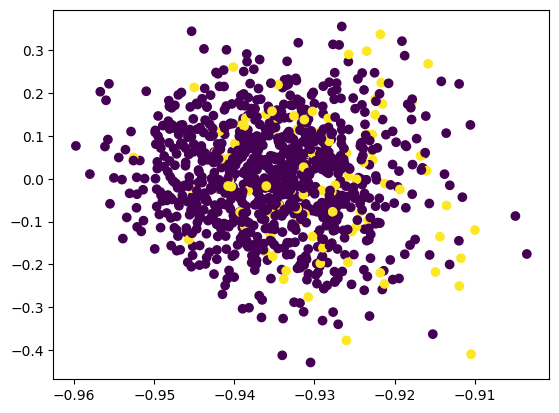

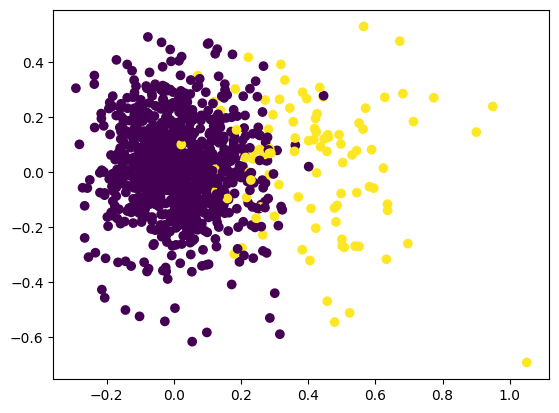

In [6]:
# we can see the importance of the Stouffer transform in separating the spec embedding
# but also that this separation gets nowhere near what even 40 BP iterations of refinement
# can achieve
embedded = spectral_clusterings.spectral(samples[0])
plt.scatter(embedded[:,0], embedded[:,1], c = gts[0])
plt.show()

G = predictor.do_transform(samples[0])
embedded = spectral_clusterings.spectral(G)
plt.scatter(embedded[:,0], embedded[:,1], c = gts[0])